# Assignment 2
## Problem 1
### part A,B
load data and scatter plot.
In the scatter plot matrix, we see that some pairs like
'vectors' and 'algebra' seem more correlated than others.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy.spatial.distance import correlation
from statsmodels import datasets as moredatasets
from scipy.linalg import inv

import networkx as nx

np.set_printoptions(precision=3)

df = pd.read_csv("./MathMarks.csv", header=0, sep=',')
df = df.drop(columns=['student_id'])
df.head()

,mechanics,vectors,algebra,analysis,statistics
0,77,82,67,67,81
1,63,78,80,70,81
2,75,73,71,66,81
3,55,72,63,70,68
4,63,63,65,70,63


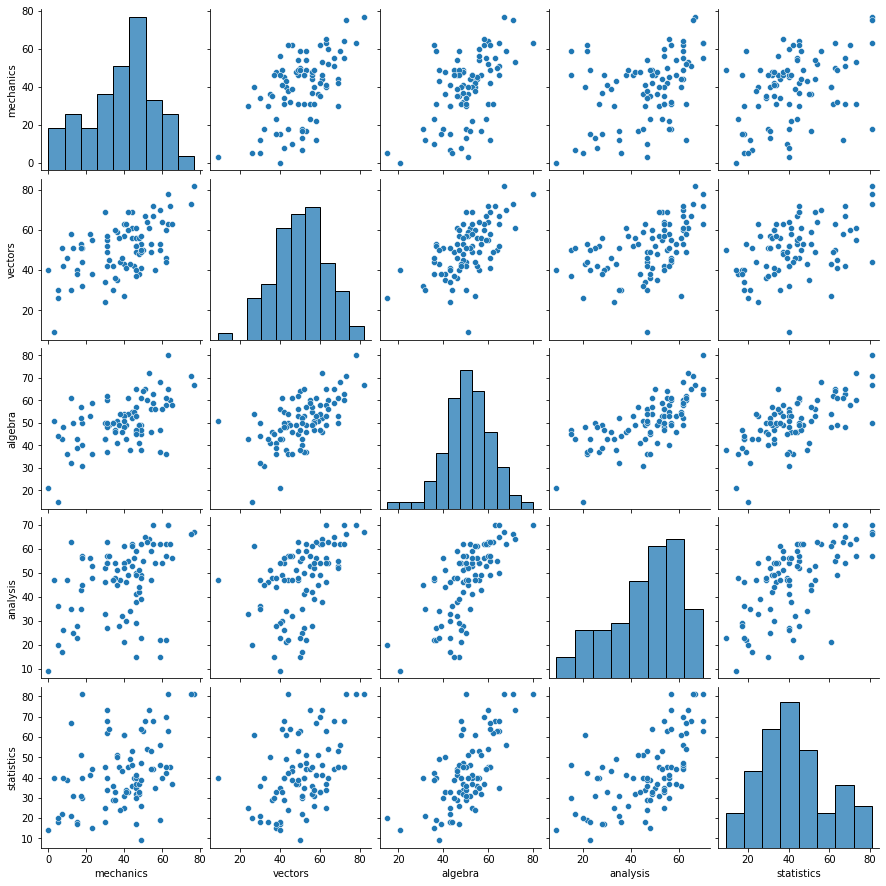

In [2]:
sns.pairplot(df, )

### part C
Calculate the correlation matrix and plot it as a heat map.

<AxesSubplot:>

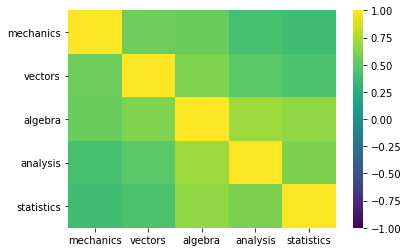

In [3]:
cormat = np.corrcoef(df, rowvar=False)
cormatdf = pd.DataFrame(cormat, columns=list(df.columns), 
        index=list(df.columns))
sns.heatmap(cormatdf, center=0, vmin=-1, vmax=1,
        cmap='viridis')

### part D
Create the score matrix $S = (\frac{D_{ii}-1}{D_{ii}})$


In [4]:
D = inv(cormat)
S = np.array([D[i,i] for i in range(5)])
S = (S - 1)/S
print(S)

[0.376 0.445 0.671 0.541 0.479]


### Part E
Fitting one vs all models, getting the $R^2$ scores.

As we see below, the $R^2$ score isn't great. Nothing gets close to the perfect $1$.

In [5]:
r2scores = np.zeros(5)
j=0
for name in df.columns:
    y = df[[name]] # predict variable
    x = df.drop(columns=name) # explain variables
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    r2scores[j] = r2_score(regr.predict(x),y)
    j+=1

print(r2scores)

[-0.662 -0.248  0.51   0.151 -0.086]


### Part F
calculate the covariance matrix $\Sigma$ 
and the precision matrix $P$, and the normalized precision $K$.

In [6]:
covmat = np.cov(df, rowvar=False)
p = inv(covmat)
scale = np.diagonal(p)
scale = np.sqrt(scale)
K = -p / scale
K = K.T
K = K / scale
K = K.T
print(K)


[[-1.000e+00  3.285e-01  2.292e-01 -7.122e-04  2.551e-02]
 [ 3.285e-01 -1.000e+00  2.816e-01  7.783e-02  1.997e-02]
 [ 2.292e-01  2.816e-01 -1.000e+00  4.318e-01  3.567e-01]
 [-7.122e-04  7.783e-02  4.318e-01 -1.000e+00  2.528e-01]
 [ 2.551e-02  1.997e-02  3.567e-01  2.528e-01 -1.000e+00]]


### Part G, H
Fitting 1 vs 3 models and getting partial correlations

In [7]:
## mechanics and vectors
ymech = df[['mechanics']]
yvect = df[['vectors']]
xtrain = df.drop(columns=["mechanics", "vectors"])
regr = linear_model.LinearRegression()
regr.fit(xtrain, ymech)
ymech_pred = regr.predict(xtrain)
regr.fit(xtrain, yvect)
yvect_pred = regr.predict(xtrain)
res_mech = ymech_pred - ymech
res_vect = yvect_pred - yvect
res_vect = res_vect.to_numpy().flatten()
res_mech = res_mech.to_numpy().flatten()
print(np.corrcoef(res_vect, res_mech),
   1 - correlation(res_vect, res_mech)) # correlation DISTANCE is 1 - correlation!


[[1.    0.328]
 [0.328 1.   ]] 0.3284628168669589


In [8]:
## mechanics and algebra 
ymech = df[['mechanics']]
yvect = df[['algebra']]
xtrain = df.drop(columns=["mechanics", "algebra"])
regr = linear_model.LinearRegression()
regr.fit(xtrain, ymech)
ymech_pred = regr.predict(xtrain)
regr.fit(xtrain, yvect)
yvect_pred = regr.predict(xtrain)
res_mech = ymech_pred - ymech
res_vect = yvect_pred - yvect
res_vect = res_vect.to_numpy().flatten()
res_mech = res_mech.to_numpy().flatten()
print(np.corrcoef(res_vect, res_mech),
   1 - correlation(res_vect, res_mech)) # correlation DISTANCE is 1 - correlation!

[[1.    0.229]
 [0.229 1.   ]] 0.2292441884913834


In [9]:
## mechanics and analysis 
ymech = df[['mechanics']]
yvect = df[['analysis']]
xtrain = df.drop(columns=["mechanics", "analysis"])
regr = linear_model.LinearRegression()
regr.fit(xtrain, ymech)
ymech_pred = regr.predict(xtrain)
regr.fit(xtrain, yvect)
yvect_pred = regr.predict(xtrain)
res_mech = ymech_pred - ymech
res_vect = yvect_pred - yvect
res_vect = res_vect.to_numpy().flatten()
res_mech = res_mech.to_numpy().flatten()
print(np.corrcoef(res_vect, res_mech),
   1 - correlation(res_vect, res_mech)) # correlation DISTANCE is 1 - correlation!


[[ 1.000e+00 -7.122e-04]
 [-7.122e-04  1.000e+00]] -0.0007121818006188274


In [10]:
## mechanics and analysis 
ymech = df[['mechanics']]
yvect = df[['analysis']]
xtrain = df.drop(columns=["mechanics", "analysis"])
regr = linear_model.LinearRegression()
regr.fit(xtrain, ymech)
ymech_pred = regr.predict(xtrain)
regr.fit(xtrain, yvect)
yvect_pred = regr.predict(xtrain)
res_mech = ymech_pred - ymech
res_vect = yvect_pred - yvect
res_vect = res_vect.to_numpy().flatten()
res_mech = res_mech.to_numpy().flatten()
print(np.corrcoef(res_vect, res_mech),
   1 - correlation(res_vect, res_mech)) # correlation DISTANCE is 1 - correlation!


[[ 1.000e+00 -7.122e-04]
 [-7.122e-04  1.000e+00]] -0.0007121818006188274


In [11]:
print(K)

[[-1.000e+00  3.285e-01  2.292e-01 -7.122e-04  2.551e-02]
 [ 3.285e-01 -1.000e+00  2.816e-01  7.783e-02  1.997e-02]
 [ 2.292e-01  2.816e-01 -1.000e+00  4.318e-01  3.567e-01]
 [-7.122e-04  7.783e-02  4.318e-01 -1.000e+00  2.528e-01]
 [ 2.551e-02  1.997e-02  3.567e-01  2.528e-01 -1.000e+00]]


In [12]:
print(K[:,0])

[-1.000e+00  3.285e-01  2.292e-01 -7.122e-04  2.551e-02]


I think the first row of $K$ is the partial correlations for "mechanics" which we have calculated above.

### Part I
heatmaps


<AxesSubplot:>

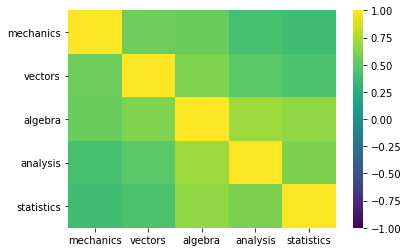

In [15]:
sns.heatmap(cormatdf, center=0, vmin=-1, vmax=1,
        cmap='viridis')

<AxesSubplot:>

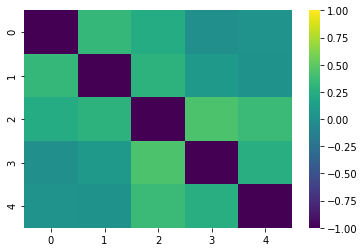

In [16]:
sns.heatmap(K, center=0, vmin=-1, vmax=1,
        cmap='viridis')




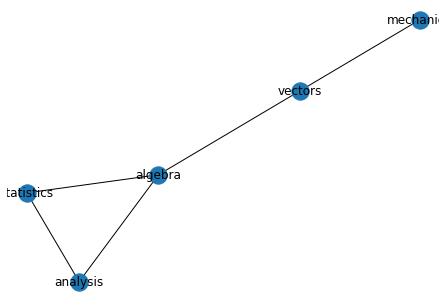

In [27]:

g = nx.from_numpy_array(K > 0.25)

mylabels = list(df.columns)
mylabels = list(zip(range(5), mylabels))
mylabels = dict(mylabels)
mylabels

nx.draw_spring(g, labels=mylabels, )


## Problem 2
### Part A 
plots.
$x$ and $y$ appear to be to most correlated, but all pairs appear to have correlation.

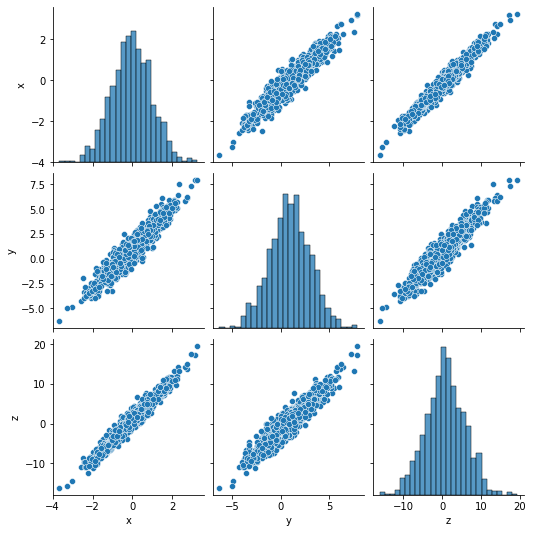

In [29]:
x = np.random.normal(0,1,1000)
eps  = np.random.normal(0,0.5,1000)
y = np.random.normal(2*x + 1, 0.5) + eps
z = np.random.normal(5*x + 1, 1) + eps
mydata = {"x" : x, "y" : y, "z" : z}
mydata = pd.DataFrame(mydata)
sns.pairplot(mydata, )



### B
Correlation matrix and heatmap.
All appear highly correlated.

[[1.    0.943 0.975]
 [0.943 1.    0.943]
 [0.975 0.943 1.   ]]


<AxesSubplot:>

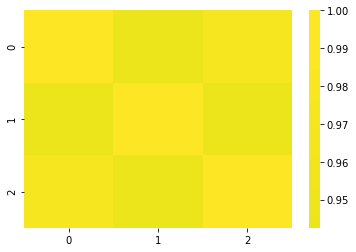

In [31]:
cormat= np.corrcoef(mydata, rowvar=False)
print(cormat)
sns.heatmap(cormat, center=0, cmap="viridis")

### Part D Partial correlation matrix
we compute the matrix which according to the most beautiful theorem gives us
the partial correlation.

In [33]:
covmat = np.cov(mydata, rowvar=False)
p = inv(covmat)
scale = np.diagonal(p)
scale = np.sqrt(scale)
K = -p / scale
K = K.T
K = K / scale
K = K.T
print(K)


[[-1.     0.324  0.771]
 [ 0.324 -1.     0.317]
 [ 0.771  0.317 -1.   ]]


### Part C Partial Correlation using the definition
Verify that it is indeed the same value as in the matrix above.


In [34]:
regr = linear_model.LinearRegression()
regr.fit(X=mydata[["x"]], y=mydata[["z"]])
zhat = regr.predict(mydata[["x"]])
regr = linear_model.LinearRegression()
regr.fit(X=mydata[["x"]], y=mydata[["y"]])
yhat = regr.predict(mydata[["x"]])

zhat = zhat.flatten()
yhat = yhat.flatten()
np.corrcoef(z - zhat, y - yhat)
1 - correlation(y-yhat, z-zhat)


0.3171812591236739

In [41]:
regr = linear_model.LinearRegression()
regr.fit(X=mydata[["y"]], y=mydata[["z"]])
zhat = regr.predict(mydata[["y"]])

regr = linear_model.LinearRegression()
regr.fit(X=mydata[["y"]], y=mydata[["x"]])
xhat = regr.predict(mydata[["y"]])

zhat = zhat.flatten()
xhat = xhat.flatten()

1 - correlation(x-xhat, z-zhat)

0.7712902990027742

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X=mydata[["z"]], y=mydata[["x"]])
xhat = regr.predict(mydata[["z"]])

regr = linear_model.LinearRegression()
regr.fit(X=mydata[["z"]], y=mydata[["y"]])
yhat = regr.predict(mydata[["z"]])

xhat = xhat.flatten()
yhat = yhat.flatten()

np.corrcoef(x - xhat, y - yhat)

1 - correlation(y-yhat, x-xhat)

0.3244888560804977

### Part E
Heatmap of the partial correlation map.
We observe that 0 $x$ and $z$ appear to be more partially correlated.

[[-1.     0.324  0.771]
 [ 0.324 -1.     0.317]
 [ 0.771  0.317 -1.   ]]


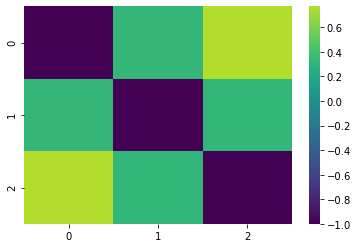

In [43]:
sns.heatmap(K, center=0, cmap="viridis")

print(K)

#p @ covmat

## Problem 3
### Part A
Because the variance of each single variable is $1$ the correlation coefficient matrix should
approach covariance matrix if the sample is large enough.

In [44]:
### Aifgabe 3
mu = np.zeros(2)
sig = np.array([[1,0.6], [0.6,1]])

Z = np.random.multivariate_normal(mu, sig, 10)
print("n=10",np.corrcoef(Z, rowvar=False))
Z = np.random.multivariate_normal(mu, sig, 100)
print("n=100",np.corrcoef(Z, rowvar=False))
Z = np.random.multivariate_normal(mu, sig, 1000)
print("n=1000",np.corrcoef(Z, rowvar=False))

[[1.    0.532]
 [0.532 1.   ]]
[[1.    0.549]
 [0.549 1.   ]]
[[1.    0.611]
 [0.611 1.   ]]


### 2 Part B

In [52]:
x = np.random.normal(0,2,100)
y = np.random.normal(1,np.sqrt(3),100)
print(np.corrcoef(x,y))

[[1.    0.081]
 [0.081 1.   ]]


Since these two are Gaussian they are independt if and only iff their correlation is $0$. As a matter of fact they are independent by design.
The correlation above is an estimation of the true correlation ($0$) and it comes pretty close to $0$.